# Contents 

### 01. Import libraries and data

### 02. Cleaning data 

### 03. Preparing data 

### 04. Regression analysis

## 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = 'C:/Users/David/Desktop/Career Foundry/King County house sales'

In [4]:
# Import KC house sales data

df = pd.read_csv(os.path.join(path, '02. Data', '02. Prepared Data', 'kc_houses_updated2.csv'))

## 02. Cleaning data 

In [5]:
df.columns

Index(['Unnamed: 0', 'house_id', 'date_sold', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'year_built', 'year_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price_category'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,house_id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,7129300520,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Low-level
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,6414100192,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Mid-Level 1
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,5631500400,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Low-level
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,2487200875,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Mid-Level 2
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,1954400510,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Mid-Level 1


In [7]:
df.shape

(21613, 23)

In [8]:
# Check missing values 
df.isnull().sum()


Unnamed: 0        0
house_id          0
date_sold         0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
year_built        0
year_renovated    0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
price_category    0
dtype: int64

In [9]:
# Check duplicates
dups = df.duplicated()

In [10]:
dups.shape

(21613,)

C:\Users\David\AppData\Local\Temp\ipykernel_23148\3561515523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=20) # Shows extreme values
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<Axes: xlabel='price', ylabel='Density'>

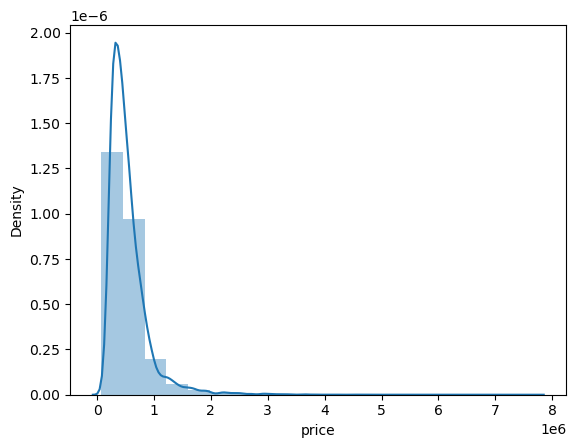

In [11]:
sns.distplot(df['price'], bins=20) # Shows extreme values

In [12]:
# Check mean
df['price'].mean()

540088.1417665294

In [13]:
# Check median
df['price'].median()

450000.0

In [14]:
# Check max
df['price'].max()

7700000.0

## 03. Data prep

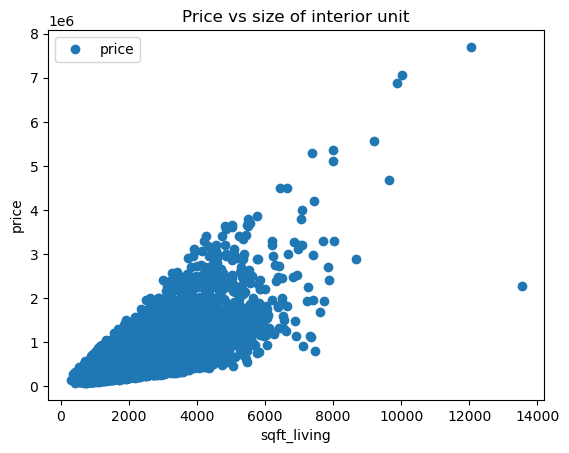

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='price',style='o') 
plt.title('Price vs size of interior unit')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

### Hypothesis: as the size of the interrior unit (in square feet) increases, the price increases. 

In [16]:
# Reshape the variables into NumPy arrays

x = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [17]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [18]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [19]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 04. Regression analysis

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

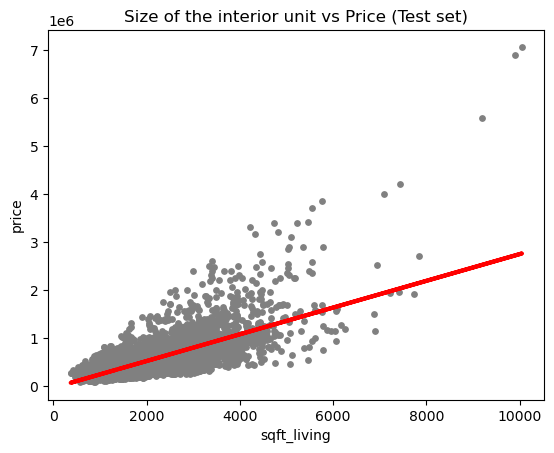

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Size of the interior unit vs Price (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


The slope shows a positive correlation between the independent and dependent variables.
The high MSE indicates that the model might not capture all the variability in the data, and there might be room for improvement.
The R2 score of 0.49 indicates that the model explains about 49% of the variance.

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000.0,3.601163e+05
1,1578000.0,1.261901e+06
2,562100.0,3.628996e+05
3,631500.0,2.766177e+05
4,780000.0,8.471914e+05
5,485000.0,4.213486e+05
6,340000.0,4.408316e+05
7,335606.0,6.685044e+05
8,425000.0,6.467948e+05
9,490000.0,1.203452e+06


In [27]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  67579354793.91106
R2 score:  0.49453356717789776


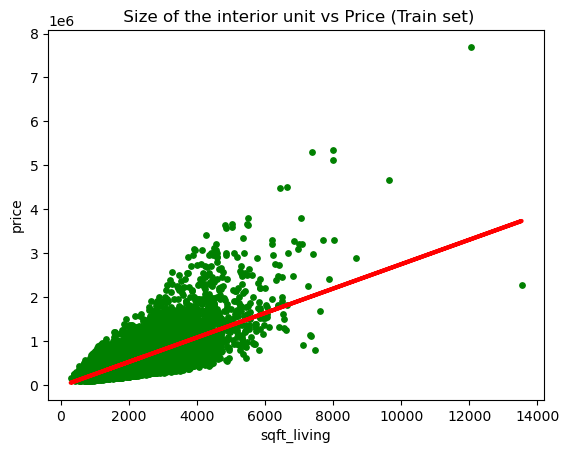

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title(' Size of the interior unit vs Price (Train set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

In [ ]:
#Export viz
plot_test.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'price_vs_Sqft_living_regression.png'))

The R2 score improvement indicates a slightly better overall fit, with about 49.45% of the variance explained. This means I haven’t overfit the model, and that the relationship isn’t purely linear. Other factors might contribute to a high price. 

#### Bonus: Removing outliers

In [31]:
# Clean the extreme values from the "Price" variable 

df_test = df[df['price'] <=2000000] 

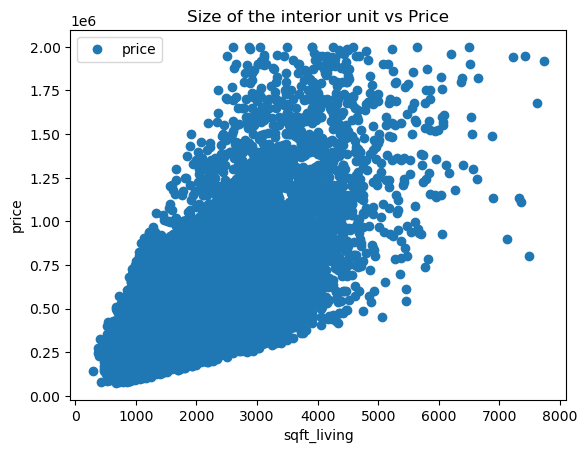

In [32]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'sqft_living', y='price', style='o')  
plt.title('Size of the interior unit vs Price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

In [33]:
# Reshape again.

x_2 = df_test['sqft_living'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [34]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0)

In [35]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [36]:
# Predict.

y_predicted_2 = regression.predict(x_test_2)

In [37]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[222.40967541]]
Mean squared error:  44942612449.74752
R2 score:  0.4766562868647247


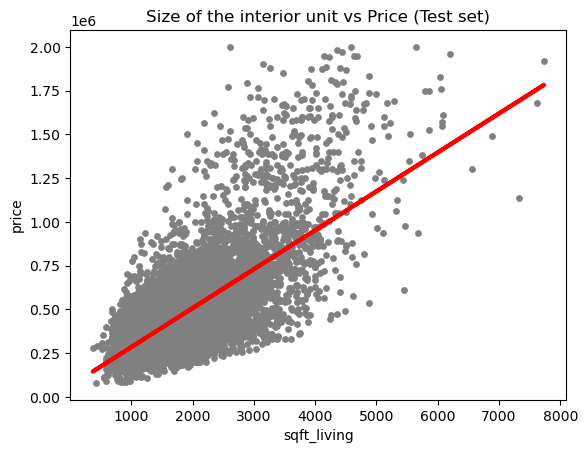

In [39]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(x_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(x_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Size of the interior unit vs Price (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

The reduced MSE suggests improved accuracy in predicting the dependent variable compared to the previous results, however,the R2 score indicates that the model explains about 47.67% of the variance in the dependent variable, indicating that I may have to consider other factors. 